## 1d toy problem
objectives:
    1. train gp regression model using gpflow for the gaussian kernel
    2. obtain access to hyperparameters
    
underlying function $f$
$$ f(x) = (6x-2)^2 \sin(12x-4)$$
subject to $x\in [0,1] \subset \mathbb{R}$

In [1]:
import gpflow
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
plt = matplotlib.pyplot
from f import *

construct and plot the dataset $\mathcal{D}^{1:t}$ using the function of interest

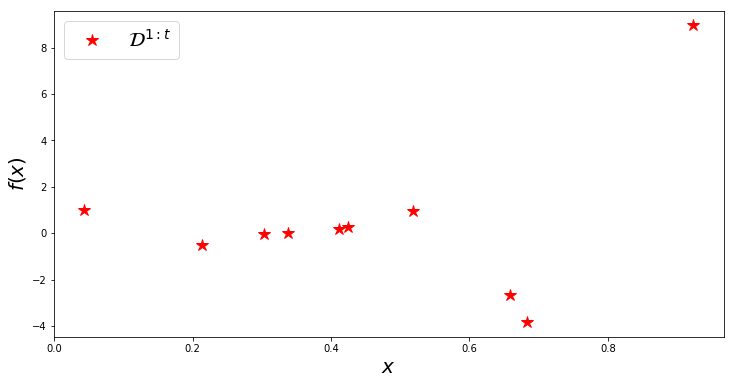

In [16]:
X = np.reshape(np.array([0.0,0.2,0.4,0.6,0.8,1.0]),(-1,1))
X = np.reshape(np.random.rand(10,1),(-1,1))
Y = np.reshape(f(X), (-1,1))
plt.plot(X,Y,'*', color='red', markersize=12, label='$\mathcal{D}^{1:t}$')
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)
plt.legend(fontsize=20)
plt.show()

## Model Construction
1. define the kernel
2. fix the likelyhood variance $\epsilon$
$$y^{1:t}=f^{1:t}+\epsilon$$

where $\epsilon\sim\mathcal{N}(0,\nu)$ denotes measurement noise (i.e. the likelyhood variance in the gpflow notation)

In [17]:
k = gpflow.kernels.RBF(1, ARD=True)
m = gpflow.models.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01
m.kern.variance.trainable = True
m.likelihood.variance.trainable = False
print(m.read_trainables())

{'GPR/kern/variance': array(1.0), 'GPR/kern/lengthscales': array([ 1.])}


plot the gp before optimizing the hyerparameters and show the hyperparameters

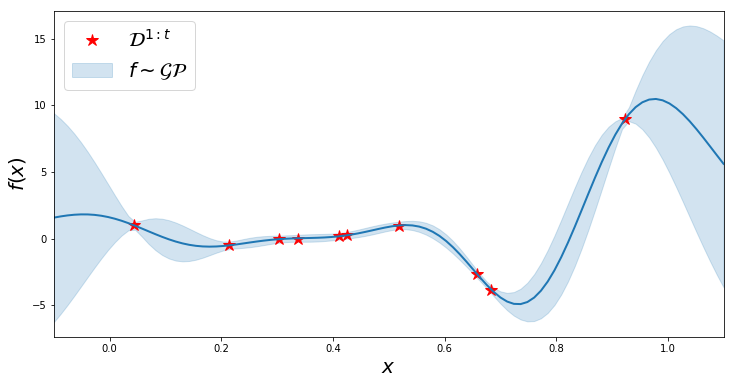

                             class prior transform  trainable shape  \
GPR/kern/lengthscales    Parameter  None       +ve       True  (1,)   
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve      False    ()   

                         fixed_shape               value  
GPR/kern/lengthscales           True      [0.1321239102]  
GPR/kern/variance               True  26.583050635488362  
GPR/likelihood/variance         True                0.01  


In [24]:
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, '*', markersize=12, color='red', label='$\mathcal{D}^{1:t}$')
    plt.plot(xx, mean, 'C0', lw=2)
    plt.fill_between(xx[:,0],
                     mean[:,0] - 2*np.sqrt(var[:,0]),
                     mean[:,0] + 2*np.sqrt(var[:,0]),
                     color='C0', alpha=0.2, label='$f\sim\mathcal{GP}$')
    plt.xlim(-0.1, 1.1)
    plt.xlabel('$x$', fontsize=20)
    plt.ylabel('$f(x)$', fontsize=20)
    plt.legend(fontsize=20, loc=2)
    plt.show()

plot(m)
print(m)

optimize the hyperparameters and replot the posterior gp

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 18.594078
  Number of iterations: 0
  Number of functions evaluations: 1


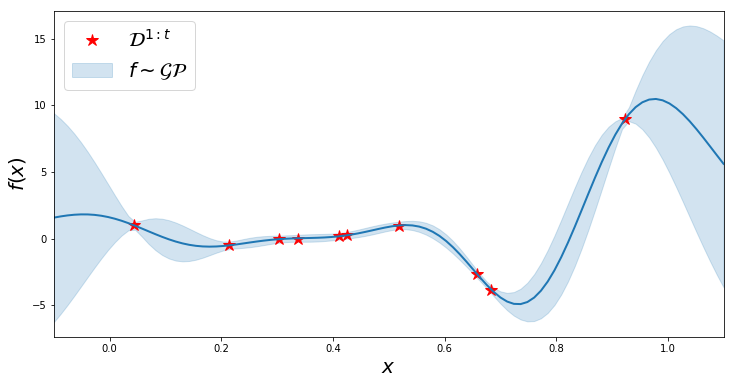

                             class prior transform  trainable shape  \
GPR/kern/lengthscales    Parameter  None       +ve       True  (1,)   
GPR/kern/variance        Parameter  None       +ve       True    ()   
GPR/likelihood/variance  Parameter  None       +ve      False    ()   

                         fixed_shape               value  
GPR/kern/lengthscales           True      [0.1321239102]  
GPR/kern/variance               True  26.583050635488362  
GPR/likelihood/variance         True                0.01  


In [25]:
gpflow.train.ScipyOptimizer().minimize(m)
m.compile()
plot(m)
print(m)

Extract the hyperparameters from the model

In [23]:
print('variance    :', m.kern.variance.value)
print('lengthscales:', m.kern.lengthscales.value)

variance    : 26.583050635488362
lengthscales: [ 0.13212391]
